In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import data_preprocessor as dp
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.tsa.stattools as ts
from itertools import product                    # some useful functions

In [3]:
filepath = "E:/csvfile/source/"
filesinpath = os.listdir(filepath)
for f in sorted(filesinpath): #for each file, ran model
    print("file name:", f)
    df = pd.read_csv(filepath + f)
    df = df[df.sno != 'sno']
    df['time'] = pd.to_datetime(df['Unnamed: 0'], format='%Y/%m/%d %H%M%S', errors='ignore') 
    df = df.set_index(pd.DatetimeIndex(df['time']))
    df = df.sort_index()
    df=df.drop(columns=['Unnamed: 0'])
    break

file name: data_sno_001.csv


In [4]:
ny = dp.data_preprocess(df)

-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------


In [5]:
ny = ny['20180301':'20180630']
small_ny = ny['20180601':'20180630']
ts = small_ny.sbi

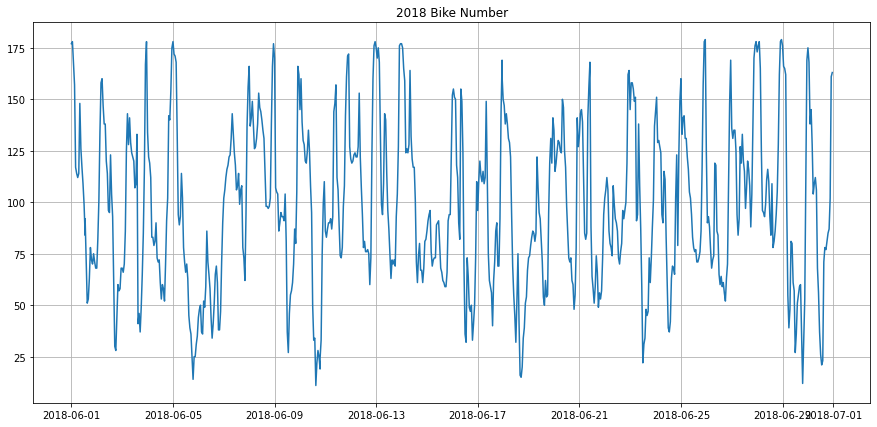

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(small_ny.bemp)
plt.title('2018 Bike Number')
plt.grid(True)
plt.show()

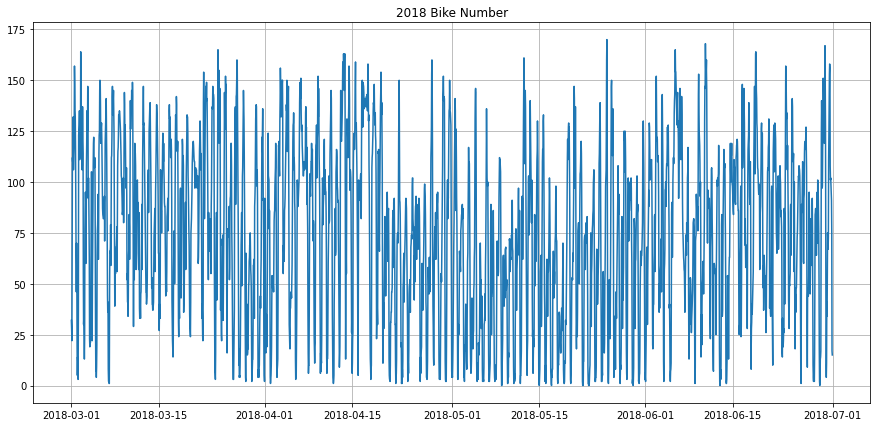

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(ny.sbi)
plt.title('2018 Bike Number')
plt.grid(True)
plt.show()

In [8]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    rmse = np.sqrt(mean_squared_error(series[window:], rolling_mean[window:]))

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        print('deviation:',deviation)
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        print(lower_bond)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

deviation: 36.96163824988343
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00          NaN
2018-06-01 03:00:00          NaN
2018-06-01 04:00:00          NaN
                         ...    
2018-06-30 19:00:00    15.742221
2018-06-30 20:00:00    17.242221
2018-06-30 21:00:00    14.325554
2018-06-30 22:00:00     5.492221
2018-06-30 23:00:00    -5.091112
Name: sbi, Length: 724, dtype: float64


36.96183331961588

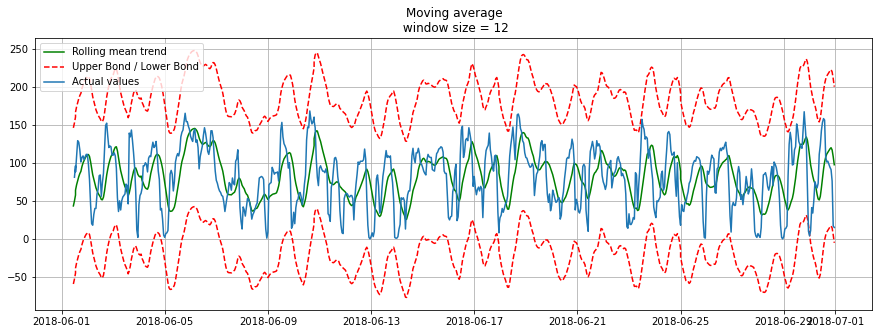

In [9]:
plotMovingAverage(ts, 12, plot_intervals=True)

deviation: 26.677570561544027
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00          NaN
2018-06-01 03:00:00          NaN
2018-06-01 04:00:00          NaN
                         ...    
2018-06-30 19:00:00    36.985871
2018-06-30 20:00:00    26.152537
2018-06-30 21:00:00    20.819204
2018-06-30 22:00:00     6.819204
2018-06-30 23:00:00    -7.680796
Name: sbi, Length: 724, dtype: float64


26.677571470441375

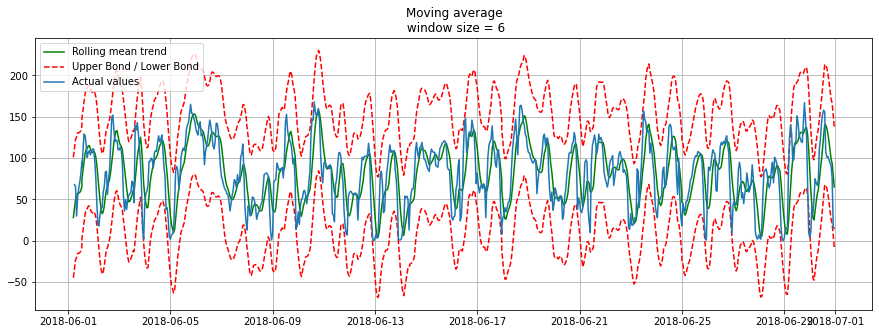

In [10]:
plotMovingAverage(ts, 6, plot_intervals=True)

deviation: 15.575033209515235
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00   -36.305151
2018-06-01 03:00:00   -29.638484
2018-06-01 04:00:00    -9.305151
                         ...    
2018-06-30 19:00:00    56.028182
2018-06-30 20:00:00    52.361516
2018-06-30 21:00:00    45.028182
2018-06-30 22:00:00    19.361516
2018-06-30 23:00:00    -5.971818
Name: sbi, Length: 724, dtype: float64


15.575036235498574

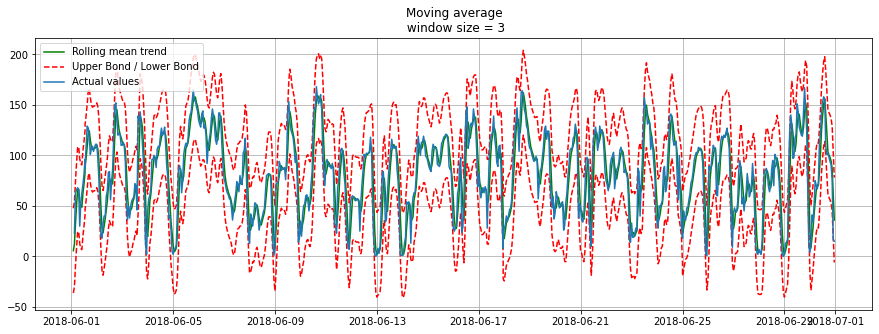

In [11]:
plotMovingAverage(ts, 3, plot_intervals=True)

In [12]:
def plotHistoricalAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(15,5))
    plt.title("Historical Average")
    remain_size = len(series) - window
    historical_mean = pd.Series([series[:window].mean()] * remain_size,index=series[window:].index)
    plt.plot(historical_mean, "g", label="Historical Mean")
    rmse = np.sqrt(mean_squared_error(series[window:], historical_mean))

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], historical_mean)
        deviation = np.std(series[window:]- historical_mean)
        lower_bond = historical_mean - (mae + scale * deviation)
        upper_bond = historical_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

39.61869171877012

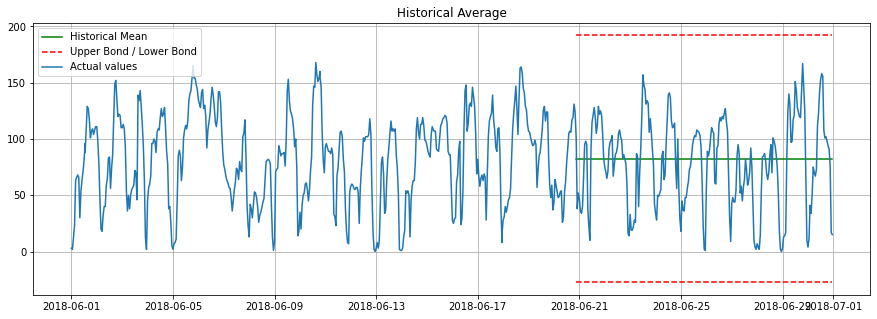

In [13]:
plotHistoricalAverage(ts,24*20,plot_intervals=True)

In [14]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        y.plot(ax=ts_ax)
        result = sm.tsa.stattools.adfuller(y)
        print(result)
        p_value = result[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

(-4.007530518473868, 0.0013715885331080163, 20, 703, {'1%': -3.4396861854831964, '5%': -2.865660062273053, '10%': -2.5689640195342456}, 5973.722239740784)


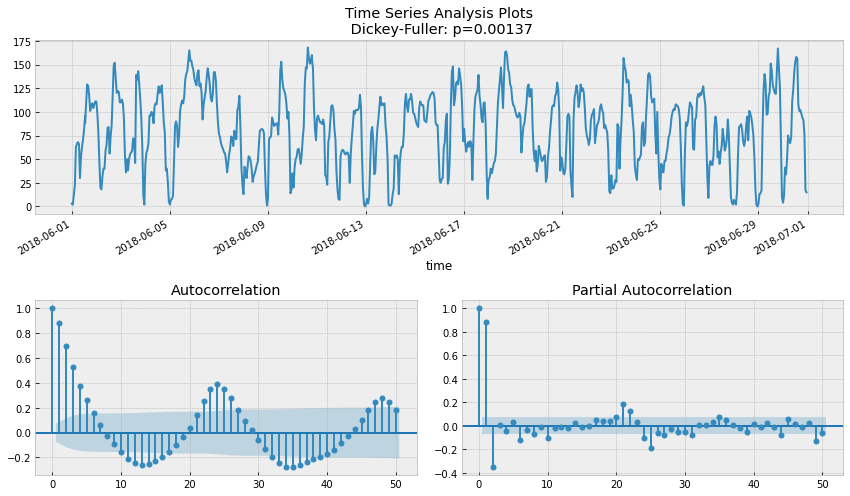

In [15]:
tsplot(ts,lags=50)

In [16]:
ps = range(0, 3)
d = 0 
qs = range(1, 5)
Ps = range(0, 3)
D= 0
Qs = range(1, 2)
s = 12 # season length is still 24
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [17]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in parameters_list:
        print('param:',param)
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ts.values, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(low_memory=True)
        except:
            continue
            
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [18]:
result_table = optimizeSARIMA(parameters_list, d, D, s)

param: (0, 1, 0, 1)
param: (0, 1, 1, 1)
param: (0, 1, 2, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (0, 2, 0, 1)
param: (0, 2, 1, 1)
param: (0, 2, 2, 1)
param: (0, 3, 0, 1)
param: (0, 3, 1, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (0, 3, 2, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (0, 4, 0, 1)
param: (0, 4, 1, 1)
param: (0, 4, 2, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (1, 1, 0, 1)
param: (1, 1, 1, 1)
param: (1, 1, 2, 1)
param: (1, 2, 0, 1)
param: (1, 2, 1, 1)
param: (1, 2, 2, 1)
param: (1, 3, 0, 1)
param: (1, 3, 1, 1)
param: (1, 3, 2, 1)
param: (1, 4, 0, 1)
param: (1, 4, 1, 1)
param: (1, 4, 2, 1)
param: (2, 1, 0, 1)
param: (2, 1, 1, 1)
param: (2, 1, 2, 1)
param: (2, 2, 0, 1)
param: (2, 2, 1, 1)
param: (2, 2, 2, 1)
param: (2, 3, 0, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (2, 3, 1, 1)
param: (2, 3, 2, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (2, 4, 0, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (2, 4, 1, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


param: (2, 4, 2, 1)


C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ts.values, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(low_memory=True)
print(best_model.summary())

C:\Users\Maureen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  724
Model:             SARIMAX(2, 0, 4)x(2, 0, [1], 12)   Log Likelihood               -3067.353
Date:                              Thu, 06 May 2021   AIC                           6154.705
Time:                                      00:26:06   BIC                           6200.553
Sample:                                           0   HQIC                          6172.400
                                              - 724                                         
Covariance Type:                             approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8025      0.028     65.155      0.000       1.748       1.857
ar.L2         -0.80

(-26.3744687189971, 0.0, 0, 698, {'1%': -3.439753311961436, '5%': -2.8656896390914217, '10%': -2.568979777013325}, 5743.685493858264)


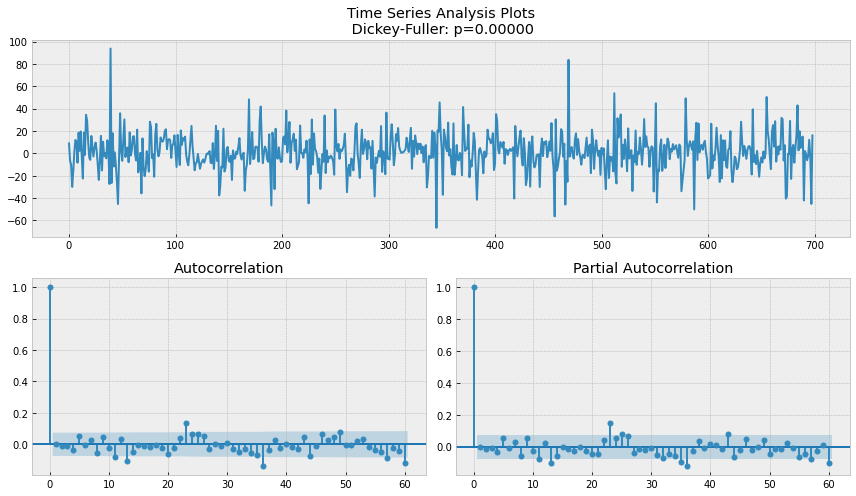

In [20]:
tsplot(best_model.resid[24+1:], lags=60)

In [49]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    #data = series.copy()
    data = pd.DataFrame(series.values)
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    data = data.reset_index().drop(columns=['index'])

    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    print((data.shape[))
    forecast = pd.Series(forecast,index=series[-(n_steps+1):].index)
    forecast = data.arima_model.append(forecast, ignore_index=True)
    # calculate error, again having shifted on s+d steps from the beginning
    #error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    error = np.sqrt(mean_squared_error(data['actual'][s+d:], data['arima_model'][s+d:]))
    print('mean_squared_error:',error)
    data = data.set_index(series.index)
    #data.to_csv("arima.csv")
    plt.figure(figsize=(20, 7))
    plt.title("Mean Squared Error: {0:.2f}%".format(error))
    plt.plot(data.arima_model, color='r', label="model")
    #plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

In [50]:
plotSARIMA(ts, best_model, 50)

KeyError: 'arima_model'